### **Homework Assignment 3: Classification Challenge**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import chi2_contingency


In [2]:
file_path1 = 'hw-3-test-data.csv'
file_path2 = 'hw-3-train-data.csv'

df_testing = pd.read_csv(file_path1)
df_training = pd.read_csv(file_path2)

In [3]:
df_training.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


### 1. Exploratory Data Analysis



#####    We ran the df.describe() function to explore our dataset and get some information before being the modeling. This includes seeing how many rows there are, the descriptive statistics for the numeric variables as well as the number of uniqure and most common values for the categorical.

In [4]:
df_training.describe()

,age,balance,day,campaign,pdays,previous
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,40.930040,1363.799462,15.811676,2.762751,40.210626,0.580715
std,10.620088,3052.574757,8.324843,3.094049,100.114045,2.311291
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000


In [5]:
df_training.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,44211,44211,44211,44211,44211,44211,44211,44211,44211,44211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9500,26632,22697,43418,24563,37133,28645,13474,36132,39015



#####    We then split our dataframde into 2. 1 for the numerical data which we then ran a correlation matrix on and found that there were no apperent correlations among the variables. The closest being between age and bank balance (R2= 0.10). Despite this very weak correlation that does intuitively make sense that older individuals would have more money saved.



In [6]:
numerical_cols = df_training.select_dtypes(include=['number']).columns
numerical_df = df_training[numerical_cols]


In [7]:
numerical_df.head(5)

,age,balance,day,campaign,pdays,previous
0,58,2143,5,1,-1,0
1,44,29,5,1,-1,0
2,33,2,5,1,-1,0
3,47,1506,5,1,-1,0
4,33,1,5,1,-1,0


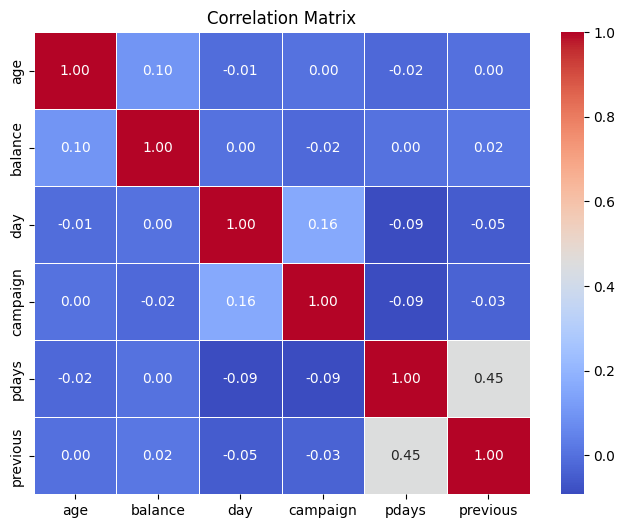

In [8]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 
plt.title('Correlation Matrix') 
plt.show()

#####    The 2nd dataframe was for the categorical variables and for this we ran a Cramers Coefficient Matrix an extension of the chi-square test. Here we also found no strong associations. However there was an association among the month and several other variables. The best besides these were between job and housing (Pi= 0.28), and job and marital status (Pi= 0.21). 

In [9]:
categorical_cols = df_training.select_dtypes(include=['object', 'category']).columns
categorical_df = df_training[categorical_cols]

In [10]:
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.sum().sum()
    phi2 = chi2_statistic / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    k_corr = k - (k - 1) * (k - 2) / (n - 1)
    r_corr = r - (r - 1) * (r - 2) / (n - 1)
    v = np.sqrt(phi2corr / min(k_corr - 1, r_corr - 1))
    
    return v

In [11]:
# List of categorical variables
categorical_vars = categorical_df.columns

# Initialize a DataFrame to store the results
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate Cramér's V for each pair of variables
for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramers_v_matrix.loc[var1, var2] = cramers_v(categorical_df[var1], categorical_df[var2])

print(cramers_v_matrix)

                job   marital education   default   housing      loan  \
job        0.999989  0.205594    0.4582  0.033266  0.280529  0.105328   
marital    0.205594  0.999989  0.121367  0.017893  0.019915  0.052955   
education    0.4582  0.121367  0.999989  0.013604  0.118829  0.079015   
default    0.033266  0.017893  0.013604  0.999347  0.002032  0.075393   
housing    0.280529  0.019915  0.118829  0.002032  0.999943  0.040446   
loan       0.105328  0.052955  0.079015  0.075393  0.040446  0.999905   
contact    0.149724  0.044538  0.122375  0.023245  0.213174  0.013825   
month      0.109494   0.07137  0.109631  0.056153    0.5036  0.182131   
poutcome   0.062343  0.027266  0.034307  0.040073  0.143415  0.054729   
y          0.135185  0.064796  0.072451  0.021548  0.139331  0.068089   

            contact     month  poutcome         y  
job        0.149724  0.109494  0.062343  0.135185  
marital    0.044538   0.07137  0.027266  0.064796  
education  0.122375  0.109631  0.034307 

##### We then began some preprocessing of the data to check for nulls (luckily there were none in this dataset), and removing outliners as defined by a Z-score of +- 4.5. We chose to use such a large Z since most most the outliners were for the variable balance and we wanted to keep as many rows as possible.

In [12]:
print(f"\nMissing Values:\n{df_training.isnull().sum()}")



Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
def Z_scoring (data_4Z, Z_col, Z_omit):
    data_4Z['Z_Score'] = zscore(data_4Z[Z_col], nan_policy='omit')
    outliers_z_score = data_4Z[np.abs(data_4Z['Z_Score']) > Z_omit]
    df_no_outliers_z = data_4Z[np.abs(data_4Z['Z_Score']) <= Z_omit]
    return df_no_outliers_z, outliers_z_score

In [14]:
df_no_outliers, outliers_z_score = Z_scoring(df_training, 'age', 4.5)
len(outliers_z_score)

12

In [15]:
df_no_outliers1 = df_no_outliers.copy()

df_no_outliers, outliers_z_score = Z_scoring(df_no_outliers1, 'balance', 4.5)
len(outliers_z_score)

339

In [16]:
outliers_z_score.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,Z_Score
328,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,3,-1,0,unknown,no,7.610428
440,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1,-1,0,unknown,yes,14.374440
904,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,2,-1,0,unknown,no,18.729613
2020,55,retired,married,secondary,no,18722,yes,no,unknown,12,may,2,-1,0,unknown,no,5.685714
2291,26,technician,single,secondary,no,24299,yes,no,unknown,13,may,1,-1,0,unknown,no,7.512489


In [17]:
df = df_no_outliers.copy()
df_clean = df.drop(["Z_Score"], axis=1, inplace=False)  

df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


##### With our cleaned dataset we futher performed some exploratory data analysis by visuliazing the variables that had the best albeit weak correlations

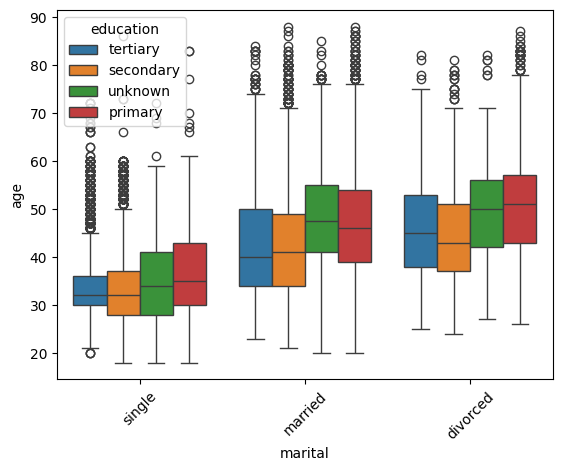

In [18]:
desired_order = ['single', 'married', 'divorced'] 

sns.boxplot(data=df_clean, x='marital', y='age', hue= 'education', order=desired_order)
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

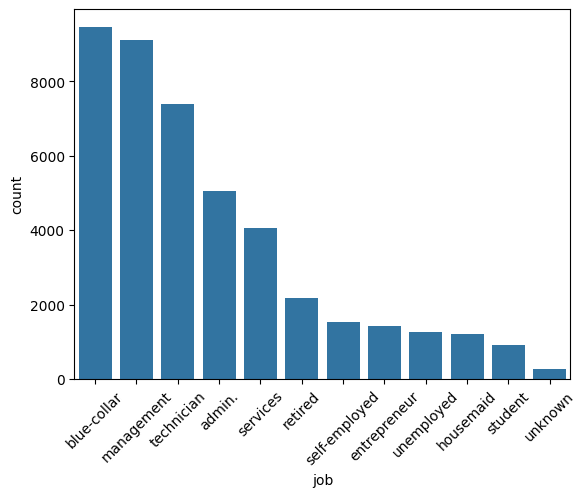

In [19]:
order_by_count = df_clean['job'].value_counts().index


sns.countplot(data=df_clean, x='job', order=order_by_count)
plt.xticks(rotation=45)

### 2. Data Preparation

##### In preparation to fit our datset to some models, we began by encoding the categorical variables. We decided to use the ordinal encoder for the martial, education and poutcome variables. This is due to us believing that these variables can be ranked in relation to predicting whether the client subscribed a term deposit. For the other variables we used the label encoder except for job which we used the one hot encoder.

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [21]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [22]:
df_train = df_clean.copy()

marital_status = ['divorced', 'single', 'married']
education_lvl = ['primary', 'secondary', 'tertiary', 'unknown']
poutcome_lvl = ['failure', 'other', 'unknown', 'success']

encoder = OrdinalEncoder(categories=[marital_status, education_lvl, poutcome_lvl])

columns_to_encode = ['marital', 'education', 'poutcome']
data_to_encode = df_train[columns_to_encode]

encoded_data = encoder.fit_transform(data_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=[f'{col}_encoded' for col in columns_to_encode], index=df_train.index)

df_encoded = pd.concat([df_train, encoded_df], axis=1)

In [23]:
df_encoded.head()
DF_clean = df_encoded.drop(["marital", "education", "poutcome"], axis=1, inplace=False)  
DF_clean.head()


,age,job,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y,marital_encoded,education_encoded,poutcome_encoded
0,58,management,no,2143,yes,no,unknown,5,may,1,-1,0,no,2.0,2.0,2.0
1,44,technician,no,29,yes,no,unknown,5,may,1,-1,0,no,1.0,1.0,2.0
2,33,entrepreneur,no,2,yes,yes,unknown,5,may,1,-1,0,no,2.0,1.0,2.0
3,47,blue-collar,no,1506,yes,no,unknown,5,may,1,-1,0,no,2.0,3.0,2.0
4,33,unknown,no,1,no,no,unknown,5,may,1,-1,0,no,1.0,3.0,2.0


In [24]:
df1 = DF_clean.copy()
label_encoder = LabelEncoder()

columns_to_encode = ['default', 'housing', 'loan', 'contact', 'month', 'y']
df1[columns_to_encode] = df1[columns_to_encode].apply(LabelEncoder().fit_transform)

In [25]:
df1.head()


,age,job,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y,marital_encoded,education_encoded,poutcome_encoded
0,58,management,0,2143,1,0,2,5,8,1,-1,0,0,2.0,2.0,2.0
1,44,technician,0,29,1,0,2,5,8,1,-1,0,0,1.0,1.0,2.0
2,33,entrepreneur,0,2,1,1,2,5,8,1,-1,0,0,2.0,1.0,2.0
3,47,blue-collar,0,1506,1,0,2,5,8,1,-1,0,0,2.0,3.0,2.0
4,33,unknown,0,1,0,0,2,5,8,1,-1,0,0,1.0,3.0,2.0


In [26]:
df2 = df1.copy()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df2[['job']])
df_one_hot = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['job']))
df_combined = pd.concat([df2, df_one_hot], axis=1)

In [27]:
df_combined = df_combined.drop(["job"], axis=1, inplace=False) 
#df_combined.to_csv('client_output.csv', index=False)  
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44206 entries, 0 to 43536
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43860 non-null  float64
 1   default            43860 non-null  float64
 2   balance            43860 non-null  float64
 3   housing            43860 non-null  float64
 4   loan               43860 non-null  float64
 5   contact            43860 non-null  float64
 6   day                43860 non-null  float64
 7   month              43860 non-null  float64
 8   campaign           43860 non-null  float64
 9   pdays              43860 non-null  float64
 10  previous           43860 non-null  float64
 11  y                  43860 non-null  float64
 12  marital_encoded    43860 non-null  float64
 13  education_encoded  43860 non-null  float64
 14  poutcome_encoded   43860 non-null  float64
 15  job_admin.         43860 non-null  float64
 16  job_blue-collar    43860 no

In [28]:
print(f"\nMissing Values:\n{df_combined.isnull().sum()}")


Missing Values:
age                  346
default              346
balance              346
housing              346
loan                 346
contact              346
day                  346
month                346
campaign             346
pdays                346
previous             346
y                    346
marital_encoded      346
education_encoded    346
poutcome_encoded     346
job_admin.           346
job_blue-collar      346
job_entrepreneur     346
job_housemaid        346
job_management       346
job_retired          346
job_self-employed    346
job_services         346
job_student          346
job_technician       346
job_unemployed       346
job_unknown          346
dtype: int64


In [29]:
df_cleaned = df_combined.dropna()

### 3. Model Selection & Evaluation

##### With the data cleaning and encoding complete we began scaling and transforming the data and experimenting with different classifiers

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier



In [31]:
X = df_cleaned.drop('y', axis=1)
y = df_cleaned['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=29)

In [32]:
def print_scores (X_train, X_test, y_train, y_test, ML_model):
    
    predictions = ML_model.predict(X_test)
    MSE = mean_squared_error(y_test, predictions)

    train = ML_model.score(X_train, y_train)
    test = ML_model.score(X_test, y_test)
    score = cross_val_score(ML_model, X_scaled, y, cv=5, scoring= "f1_macro")


    print(f"Model: {ML_model}")
    print(f"Average F1 Score: {np.mean(score)}")
    print(f"The MSE for the model is: {MSE}") 
    print(f"Training Data R2 Score is: {train}")
    print(f"Testing Data R2 Score is: {test}")
    print(f'') 



In [33]:
svc_clff = SVC()
svc_clff.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, svc_clff)


Model: SVC()
Average F1 Score: 0.5341286630683963
The MSE for the model is: 0.1014799154334038
Training Data R2 Score is: 0.8947755477248353
Testing Data R2 Score is: 0.8985200845665962



In [34]:

digit_clf = SGDClassifier(random_state=24)
digit_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, digit_clf)


Model: SGDClassifier(random_state=24)
Average F1 Score: 0.5290609447945215
The MSE for the model is: 0.10993657505285412
Training Data R2 Score is: 0.8841734334303661
Testing Data R2 Score is: 0.8900634249471459



In [35]:
tre_clf = DecisionTreeClassifier(random_state=24)
tre_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, tre_clf)


Model: DecisionTreeClassifier(random_state=24)
Average F1 Score: 0.2314708721972404
The MSE for the model is: 0.1661917455648497
Training Data R2 Score is: 1.0
Testing Data R2 Score is: 0.8338082544351503



k: 1, Train/Test Score: 1.000/0.843
k: 3, Train/Test Score: 0.913/0.879
k: 5, Train/Test Score: 0.901/0.891
k: 7, Train/Test Score: 0.896/0.893
k: 9, Train/Test Score: 0.895/0.895
k: 11, Train/Test Score: 0.894/0.895
k: 13, Train/Test Score: 0.893/0.895
k: 15, Train/Test Score: 0.892/0.895
k: 17, Train/Test Score: 0.891/0.896
k: 19, Train/Test Score: 0.891/0.896


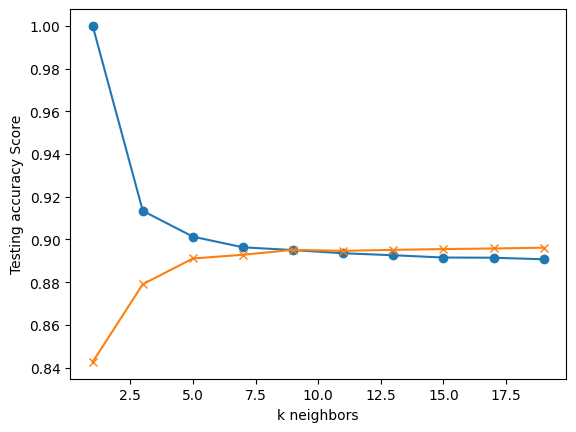

In [36]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, knn)


Model: KNeighborsClassifier(n_neighbors=8)
Average F1 Score: 0.4928677670460916
The MSE for the model is: 0.10589208566963876
Training Data R2 Score is: 0.8942239926459323
Testing Data R2 Score is: 0.8941079143303613



In [38]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, max_features='sqrt', oob_score=True, random_state=42)
rf_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, rf_clf)


Model: RandomForestClassifier(max_depth=3, n_estimators=500, oob_score=True,
                       random_state=42)
Average F1 Score: 0.5097024181403567
The MSE for the model is: 0.10809817078775623
Training Data R2 Score is: 0.8863183698483224
Testing Data R2 Score is: 0.8919018292122438



### 4. Model Feature Engineering 

##### The SVC and SGD Classifier models gave us the best fits with F1 scores of 0.534 and 0.529 respectively. Given these relatively low F1s we experimented with some feature engineering techniques primarily dimension reduction, boosting and then an ensemble classifier.

In [39]:
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


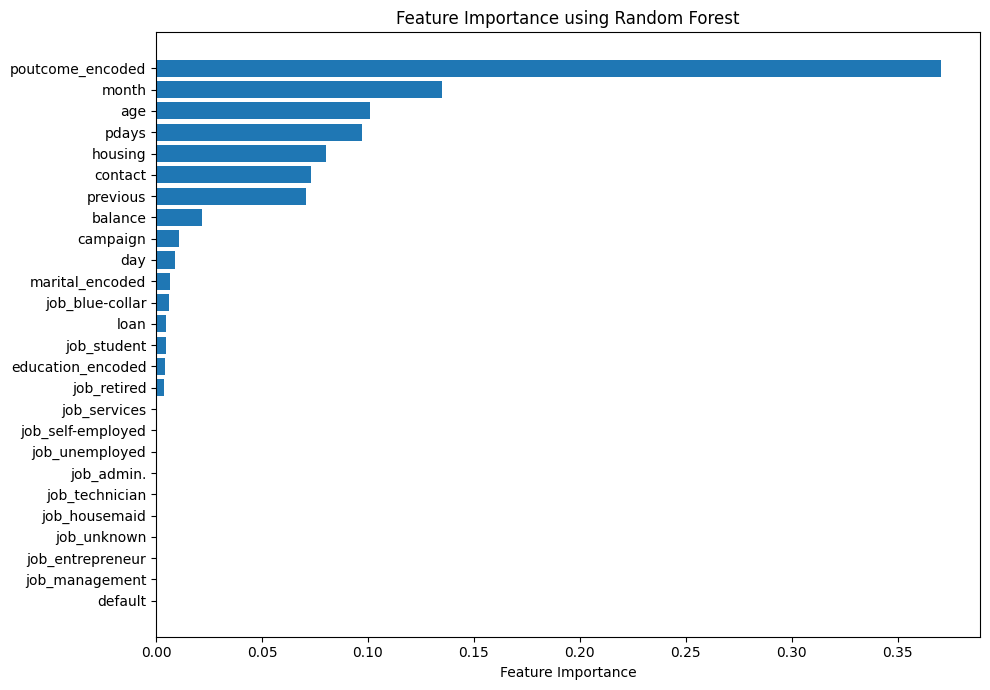

In [40]:
importances = rf_clf.feature_importances_

sorted_idx = np.argsort(importances)

feature_names = X.columns

plt.figure(figsize=(10, 7))

plt.barh(range(X.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), feature_names[sorted_idx])

plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.tight_layout()  
plt.show()


In [41]:
new_dataset = df_cleaned[['poutcome_encoded','month', 'age', 'pdays', 'housing', 'contact', 'previous', 'balance', 'y']]

In [42]:
X = new_dataset.drop('y', axis=1)
y = new_dataset['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=29)

In [43]:
svc_clfd = SVC()
svc_clfd.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, svc_clfd)


Model: SVC()
Average F1 Score: 0.5276715773650112
The MSE for the model is: 0.1015718356466587
Training Data R2 Score is: 0.8948674735713191
Testing Data R2 Score is: 0.8984281643533413



In [44]:
digit_clf = SGDClassifier(random_state=24)
digit_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, digit_clf)


Model: SGDClassifier(random_state=24)
Average F1 Score: 0.5170132035029851
The MSE for the model is: 0.10736280908171707
Training Data R2 Score is: 0.8857055308717634
Testing Data R2 Score is: 0.892637190918283



In [45]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, max_features='sqrt', oob_score=True, random_state=42)
rf_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, rf_clf)


Model: RandomForestClassifier(max_depth=3, n_estimators=500, oob_score=True,
                       random_state=42)
Average F1 Score: 0.49769228036400187
The MSE for the model is: 0.1066274473756779
Training Data R2 Score is: 0.8891067871916654
Testing Data R2 Score is: 0.8933725526243221



In [46]:
gbrt_best = GradientBoostingClassifier(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)
gbrt_best.n_estimators_

309

In [47]:
gbrt_best = GradientBoostingClassifier(
    max_depth=2, learning_rate=0.05, n_estimators=309, random_state=42)
gbrt_best.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, gbrt_best)


Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=309,
                           random_state=42)
Average F1 Score: 0.41807378190551636
The MSE for the model is: 0.1033183196985017
Training Data R2 Score is: 0.8951738930595986
Testing Data R2 Score is: 0.8966816803014983



In [48]:

X = df_cleaned.drop('y', axis=1)
y = df_cleaned['y']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=29)

In [49]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, svc_clf)


Model: SVC()
Average F1 Score: 0.5276715773650112
The MSE for the model is: 0.11002849526610901
Training Data R2 Score is: 0.8835912364026353
Testing Data R2 Score is: 0.889971504733891



In [50]:
digit_clf = SGDClassifier(random_state=24)
digit_clf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, digit_clf)


Model: SGDClassifier(random_state=24)
Average F1 Score: 0.5170132035029851
The MSE for the model is: 0.16582406471183014
Training Data R2 Score is: 0.8317757009345794
Testing Data R2 Score is: 0.8341759352881699



In [51]:
# Defining the classifiersv
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, max_features='sqrt', oob_score=True, random_state=42) 
svm_clf = SVC(probability=True, random_state=42) # 'probability=True' to enable soft voting
knn = KNeighborsClassifier(n_neighbors= 8)

voting_hard_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('svm', svm_clf), ('knn', knn)],
    voting='hard')
voting_hard_clf.fit(X_train, y_train)

voting_soft_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('svm', svm_clf), ('knn', knn)],
    voting='soft')
voting_soft_clf.fit(X_train, y_train)

# Evaluating classifiers
for clf in (rf_clf, svm_clf, knn, voting_hard_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.889971504733891
SVC 0.889971504733891
KNeighborsClassifier 0.8889603823880872
VotingClassifier 0.889971504733891
VotingClassifier 0.889971504733891


In [52]:
print_scores(X_train, X_test, y_train, y_test, voting_hard_clf)


Model: VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=3,
                                                     n_estimators=500,
                                                     oob_score=True,
                                                     random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=8))])
Average F1 Score: 0.4939282071910703
The MSE for the model is: 0.11002849526610901
Training Data R2 Score is: 0.8835912364026353
Testing Data R2 Score is: 0.889971504733891



### 5. Model Testing & Predictions 

##### After running PCA, manual dimenson reduction and the ensemble classifier we did not see any inprovement in F1 over our best model (SVC). Given this we decided to use the standard scaler with the SVC model on the test dataset, being sure to replicate the exact processing steps used on the training dataset

In [53]:
df_testing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,52,entrepreneur,married,primary,no,657,no,no,telephone,7,dec,2,217,1,other
1,34,blue-collar,married,secondary,no,0,yes,yes,cellular,5,feb,6,-1,0,unknown
2,38,housemaid,divorced,primary,no,359,no,no,unknown,9,jun,4,-1,0,unknown
3,58,blue-collar,married,primary,no,189,yes,no,telephone,8,apr,1,-1,0,unknown
4,43,services,married,secondary,no,2478,yes,no,unknown,12,jun,1,-1,0,unknown


In [54]:
df_no_outliers, outliers_z_score = Z_scoring(df_testing, 'age', 4.5)
df_no_outliers1 = df_no_outliers.copy()

df_no_outliers, outliers_z_score = Z_scoring(df_no_outliers1, 'balance', 4.5)

df = df_no_outliers.copy()
df_clean = df.drop(["Z_Score"], axis=1, inplace=False)  

df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,52,entrepreneur,married,primary,no,657,no,no,telephone,7,dec,2,217,1,other
1,34,blue-collar,married,secondary,no,0,yes,yes,cellular,5,feb,6,-1,0,unknown
2,38,housemaid,divorced,primary,no,359,no,no,unknown,9,jun,4,-1,0,unknown
3,58,blue-collar,married,primary,no,189,yes,no,telephone,8,apr,1,-1,0,unknown
4,43,services,married,secondary,no,2478,yes,no,unknown,12,jun,1,-1,0,unknown


In [55]:
df_test = df_clean.copy()

marital_status = ['divorced', 'single', 'married']
education_lvl = ['primary', 'secondary', 'tertiary', 'unknown']
poutcome_lvl = ['failure', 'other', 'unknown', 'success']

encoder = OrdinalEncoder(categories=[marital_status, education_lvl, poutcome_lvl])

columns_to_encode = ['marital', 'education', 'poutcome']
data_to_encode = df_test[columns_to_encode]

encoded_data = encoder.fit_transform(data_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=[f'{col}_encoded' for col in columns_to_encode], index=df_test.index)

df_encoded = pd.concat([df_test, encoded_df], axis=1)

df_encoded.head()
DF_clean = df_encoded.drop(["marital", "education", "poutcome"], axis=1, inplace=False)  
DF_clean.head()

,age,job,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,marital_encoded,education_encoded,poutcome_encoded
0,52,entrepreneur,no,657,no,no,telephone,7,dec,2,217,1,2.0,0.0,1.0
1,34,blue-collar,no,0,yes,yes,cellular,5,feb,6,-1,0,2.0,1.0,2.0
2,38,housemaid,no,359,no,no,unknown,9,jun,4,-1,0,0.0,0.0,2.0
3,58,blue-collar,no,189,yes,no,telephone,8,apr,1,-1,0,2.0,0.0,2.0
4,43,services,no,2478,yes,no,unknown,12,jun,1,-1,0,2.0,1.0,2.0


In [56]:
df1 = DF_clean.copy()
label_encoder = LabelEncoder()

columns_to_encode = ['default', 'housing', 'loan', 'contact', 'month']
df1[columns_to_encode] = df1[columns_to_encode].apply(LabelEncoder().fit_transform)

df2 = df1.copy()

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df2[['job']])
df_one_hot = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['job']))
df_combined = pd.concat([df2, df_one_hot], axis=1)

df_combined = df_combined.drop(["job"], axis=1, inplace=False) 
df_combined.head()

,age,default,balance,housing,loan,contact,day,month,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,52.0,0.0,657.0,0.0,0.0,1.0,7.0,2.0,2.0,217.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,6.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,0.0,359.0,0.0,0.0,2.0,9.0,6.0,4.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58.0,0.0,189.0,1.0,0.0,1.0,8.0,0.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,0.0,2478.0,1.0,0.0,2.0,12.0,6.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
df_cleaned = df_combined.dropna()

In [58]:
scaler = StandardScaler()
df_cleanedx = scaler.fit_transform(df_cleaned)

In [62]:
predictionst = svc_clff.predict(df_cleaned)
df_cleaned['y'] = predictionst

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Black Knight\AppData\Local\Temp\ipykernel_19172\2290790070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['y'] = predictionst


In [63]:
df_test.to_csv('answers.csv', index=False)  

### 6. Conclusion

The best model was the SVM Classifier with with a standard scaler transformation. It acieved a Average F1 Score of 0.534. While this was very low, this could be due to the complexity of the dataset.

There are severl things that could have impacted the performance and we experimented with ways to mitigate them. 
First and foremost was the way we decided with handling the categorical variables. We also decided to use a fairly high Z score when calculating the outliners in order to preserve the majority of the data. The rational being that having a high bank balance or potentiatly having high debt is not imaterial to the outcome variable, whether the client subscirbed to a term deposit.
